# Praca domowa nr 2 - Ada Gąssowska

In [140]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [141]:
data = pd.read_csv("https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1")

In [142]:
data.head(10)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"
5,5,2016-04-03 16:31:01,4790991674,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,Noemi-bielizna,10.99,1,742,0,39371,GĄBIN,"Odzież, Obuwie, Dodatki"
6,6,2016-04-03 17:56:11,4790991674,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,Noemi-bielizna,10.99,1,742,0,39371,GĄBIN,"Odzież, Obuwie, Dodatki"
7,7,2016-04-03 11:58:55,4824025074,"['Biżuteria i Zegarki', 'Zegarki', 'Dziecięce']",1,1,handel_barbo,28.99,1,886,0,4287,Legionowo,Biżuteria i Zegarki
8,8,2016-04-03 18:18:37,4826332874,"['RTV i AGD', 'AGD drobne', 'Higiena i pielęgn...",1,1,jupiter2009,12.00,0,49,0,5403,zachodniopomorskie,RTV i AGD
9,9,2016-04-03 22:56:56,4828603874,"['RTV i AGD', 'Kamery', 'Zasilanie', 'Zasilacze']",1,1,e-trade-com-pl,45.00,1,4,0,15561,Warszawa,RTV i AGD


Aby mieć pewność, że nie rozróżniamy lokalizacji, które różnią się tylko wielkością liter (np Warszawa i warszawa) zamieniamy wszystkie litery na małe. 

In [143]:
data.it_location=data.it_location.str.lower()

In [144]:
! pip install category_encoders


In [145]:
import category_encoders
data1 =  data.drop(columns=["price"])
data_target = data["price"]


## Target encoding dla zmiennej it_location

Jako target traktujemy zmienną price - jest to więc zadanie z regresji. W tym przypadku możemy inerpretować to tak, że każdej lokalizacji przypisujemy średnią cenę produktu

In [146]:
te=category_encoders.target_encoder.TargetEncoder(data1['it_location'])
encoded_location=te.fit_transform(data1['it_location'],data_target) #nie fit a fit_transform
encoded_location
data1.it_location = encoded_location.it_location
data1.head(5)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,0,50177,84.132898,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,0,12428,84.132898,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,0,7389,64.883187,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,0,971,0,15006,35.433365,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,1,950,0,32975,73.772916,"Odzież, Obuwie, Dodatki"


In [147]:
unique = data.it_location.unique()
unique.size

7903

Zmienna location przyjmuje prawie 8000 wartości,więc gdybyśmy użyli one-hot encodingu oznaczałoby to konieczność stworzenia dodatkowych 8000 kolumn przez co różne obliczenia mogłyby trwać dużo dłużej. W przypadku target encodingu liczba kolumn pozostaje bez zmian. Target encoding jest więc dobrym pomysłem, kiedy nasza zmienna kategoryczna przyjmuje bardzo dużo wartości.

# Kodowanie zmiennej main_category

## One-hot encoding

In [148]:
ohe = category_encoders.one_hot.OneHotEncoder(data1['main_category'])
encoded_category_1=ohe.fit_transform(data1['main_category'],data_target) 
encoded_category_1

,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5,main_category_6,main_category_7,main_category_8,main_category_9,main_category_10,...,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25,main_category_26,main_category_27
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420016,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
420017,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420018,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Zmienna main category przyjmuje 27 wartości, one-hot encoding powoduje więc powstanie 27 kolumn. W każdej kolumnie znajdują się zera i jedynki - zero jeśli dana pozycja nie należy do danej kategorii, a 1 jeśli należy. Jest to więc prosta i skuteczna metoda kodowania, jednak w przypadku dużej ilości wartości które przyjmuje zmienna powoduje powstanie dużej ilości kolumn, a co za tym idzie spowolnienie procesu. 

## Leave one out encoding

In [149]:
loe = category_encoders.leave_one_out.LeaveOneOutEncoder(data1["main_category"])
encoded_category_2=loe.fit_transform(data1['main_category'],data_target)
encoded_category_2


,main_category
0,121.814331
1,75.859357
2,72.434342
3,25.028061
4,75.859080
...,...
420015,107.530709
420016,28.129044
420017,75.859337
420018,71.203327


Leave one out encoding, działa podobnie do target encodig jednak podczas obliczania "średniej" wartości target ignoruje aktualną pozycję. Dzięki temu na wartości mniej wpływają outliery w danej kategorii. Tak jak w przypadku target encodingu powstaje tylko jedna kolumna. 

## Binary encoding

In [150]:
bde = category_encoders.binary.BinaryEncoder(data1['main_category'])
encoded_category_3=bde.fit_transform(data1['main_category'],data_target)
encoded_category_3


,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,1,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
420015,0,0,0,1,1,0
420016,0,0,1,0,0,1
420017,0,0,0,0,1,0
420018,0,0,1,0,0,0


Binary encoding polega na reprezentacji każdej unikalnej wartości przyjmowanej przez zmienną poprzez liczbę naturalną, oraz przedstawienie jej w systemie binarnym. Kolumny oznaczają kolejne potęgi dwójki. Jak widać liczba kolumn w porównaniu z one-hot encoding jest dużo niższa. 

# Braki danych

W drugiej części pracy domowej zajmę sie wypełnianiem braków danych za pomocą algorytmu k najbliższych sąsiadów. Jak sama nazwa wskazuje, algorytm sprawdza wartość zmiennej dla najbardziej "podobnych" rekordów i na ich podstawie wylicza oczekiwaną wartość zmiennej. 

In [151]:
import statistics
import random
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error


In [152]:
data2 = data[['price', 'it_seller_rating','it_quantity']] #tylko numeryczne kolumny
data2=data2.head(10000) #biorę pierwsze 10000 obserwacji, dla całej ramki bardzo wolno działa
n= np.size(data2.price)
m=n//10
rmse_1 = []

In [153]:
data2.head(5)

,price,it_seller_rating,it_quantity
0,59.99,50177,997
1,4.90,12428,9288
2,109.90,7389,895
3,18.50,15006,971
4,19.90,32975,950


# Braki danych tylko w kolumnie it_seller_rating

In [154]:
for i in range(10):
    
    data_pom = data2.copy()
    x = random.sample(range(n), m) #indeksy wierszy do zamiany na NaN'y - sample aby się nie powtarzały indeksy
    data_pom.it_seller_rating.loc[x] = np.nan
    
    imputer = KNNImputer(n_neighbors=100, weights="uniform") #jako n_neighbors biorę pierwiastek z liczby obserwacji
    result = pd.DataFrame(imputer.fit_transform(data_pom)) #ramka wynikowa
    
    rmse_1.append(mean_squared_error(result, data2, squared=False)) #obliczanie RMSE

### Wynik RMSE

In [155]:
rmse_1

[6373.257807703438,
 6109.476236284591,
 6723.592957450372,
 5731.202177876166,
 6167.730213061549,
 5736.582930265697,
 5940.851976251321,
 6070.366668388574,
 5994.821436456036,
 5855.036625459279]

### Odchylenie standardowe wskaźnika RMSE

In [156]:
stdev = statistics.stdev(rmse_1)
stdev  #odchylenie standardowe dość duże

302.7189913701324

# Braki danych w kolumnach it_seller_rating oraz it_quantity

In [157]:
rmse_2 = []

In [158]:
for i in range(10):
    
    data_pom2 = data2.copy()
    x = random.sample(range(n), m) #indeksy wierszy do zamiany na NaN'y - sample aby się nie powtarzały indeksy
    y  = random.sample(range(n),m)
    data_pom2.it_seller_rating.loc[x] = np.nan
    data_pom2.it_quantity.loc[y] = np.nan
    
    imputer = KNNImputer(n_neighbors=100, weights="uniform") #jako n_neighbors biorę pierwiastek z liczby obserwacji
    result = pd.DataFrame(imputer.fit_transform(data_pom2)) #ramka wynikowa
    
    rmse_2.append(mean_squared_error(result, data2, squared=False)) #obliczanie RMSE

### Wynik RMSE

In [159]:
rmse_2

[7839.593335264895,
 6821.68722612059,
 7639.608962255726,
 7561.9160133341,
 7124.944476952116,
 7605.85558392652,
 7902.281937754309,
 7722.047468135197,
 7495.859499440726,
 7483.276658482173]

### Odchylenie standardowe wskaźnika RMSE

In [160]:
stdev = statistics.stdev(rmse_2)
stdev  #odchylenie standardowe jeszcze większe

326.288403920985

## RYSUNEK

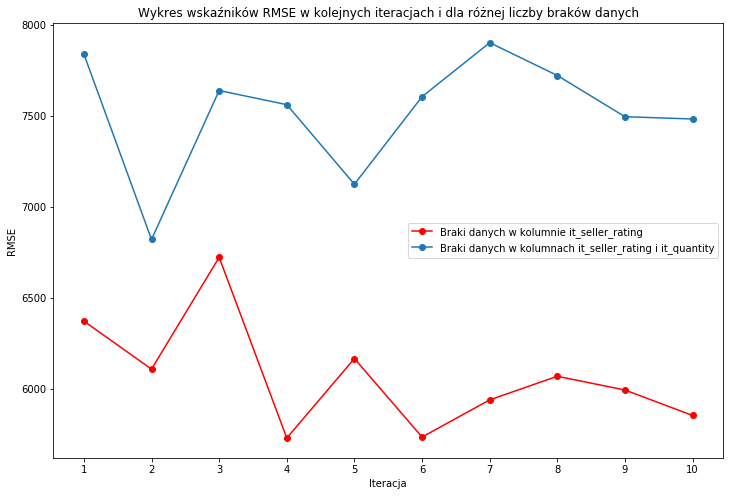

In [161]:
it_nr = list(range(1,11))
                   
fig,ax = plt.subplots()

rmse_1_plot = ax.plot(it_nr,rmse_1, label='Braki danych w kolumnie it_seller_rating', marker='o', linestyle = '-',color='red')
rmse_2_plot = ax.plot(it_nr,rmse_2, label='Braki danych w kolumnach it_seller_rating i it_quantity', marker='o', linestyle = '-')
plt.title('Wykres wskaźników RMSE w kolejnych iteracjach i dla różnej liczby braków danych')
plt.xticks(range(1,11))
plt.xlabel("Iteracja")
plt.ylabel("RMSE")
legend = ax.legend()

plt.show()

Wskaźnik RMSE jak można było się spodziewać, jest niższy gdy braków danych mamy mniej (tylko w jednej kolumnie). Co ciekawe wartości wskaźnika przyjmują bardzo zróżnicowane wartości (szczególnie gdy braki występują w dwóch kolumnach, wskaźnik RMSE przyjmuje zarówno wartości ok. 7000 jak i ok. 9000), co pokazuje jak dużą rolę gra losowość w algorytmie k najbliższych sąsiadów. 